In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as con
from Double_Pendulum_Functions import DP_Solver as DP
from Double_Pendulum_Functions import Initial_Conditions as IC

In [4]:
class Initial_Conditions:
    def __init__(init, arg1, arg2, arg3, arg4, arg5, arg6, arg7, arg8, arg9, arg10, arg11):
        """
        Args: in numeric order specific for Double Pendulum
            g: gravity
            l1: length of upper pendulum in meter
            l2: length of lower pendulum in meter
            m1: attached mass on the upper pendulum in kg
            m2: attached mass on the lower pendulum in kg
            theta1: initial angular space of the upper pendulum theta1, at t = 0
            theta2: initial angular space of the lower pendulum theta2, at t = 0
            omega1: initial angular velocity of the upper pendulum theta1, at t = 0
            omega2: initial angular velocity of the lower pendulum theta2, at t = 0
            s: time step for the simulation
            t: end time of the simulation
        Return:
            array of the above arguments
        """
        init.arg1 = arg1
        init.arg2 = arg2
        init.arg3 = arg3
        init.arg4 = arg4
        init.arg5 = arg5
        init.arg6 = arg6
        init.arg7 = arg7
        init.arg8 = arg8
        init.arg9 = arg9
        init.arg10 = arg10
        init.arg11 = arg11

time = np.array([10,10,10])
framerate = np.array([80,30,30])
gravity = np.array([con.g, con.g, con.g])
length1 = np.array([1, 1, 1])
length2 = np.array([1, 1, 1])
mass1 = np.array([1, 1, 1])
mass2 = np.array([1, 1, 1])
theta1 = np.array([0.3,0.7,1])
theta2 = np.array([0.7,0.7,1])
omega1 = np.array([0, 0, 0])
omega2 = np.array([0, 0, 0])


def AutoPlot(c,gr,n,v1=0,v2=0):
    """
    c: the array of initial conditions
    
    gr: the graph to be produced an integer 1-5
        1 is distance1 vs time
        2 is velocity1 vs time
        3 is velocity1 vs distance1
        
        4 is distance2 vs time
        5 is velocity2 vs time
        6 is velocity2 vs distance2
        
        7 is the trajectory plot
        
    n: number of simulations to run
    v1: the change in theta1 for each simulation ran
    v2: the change in theta 2 for each simulation ran
    """


    dp_conditions = np.zeros(n, dtype=object)
    for i in range(n):
        dp_conditions[i] = IC(c.arg1, c.arg2, c.arg3, c.arg4, c.arg5, c.arg6+i*v1, c.arg7+i*v2, c.arg8, c.arg9)

    dp_data = np.zeros([n,5], dtype=object)
    for i in range(n):
        for j in range(5):
            dp_data[i,j] = DP(dp_conditions[i], c.arg11, c.arg10)[j]
        
    if(gr == 1):
        for i in range(n):
            plt.plot(dp_data[i,0], dp_data[i,1])
            plt.title('Angular displacement1 over time')
            plt.xlabel('$t$')
            plt.ylabel('$\Theta$')
            plt.show()

    if(gr == 2):
        for i in range(n):
            plt.plot(dp_data[i,0], dp_data[i,3])
            plt.title('Angular Velocity1 over time')
            plt.xlabel('$t$')
            plt.ylabel('$\Theta$`')
            plt.show()

    if(gr == 3):
        for i in range(n):
            plt.plot(dp_data[i,1], dp_data[i,3])

        plt.title('Angular displacement1 compared to Angular Velocity1')
        plt.xlabel('$\Theta$')
        plt.ylabel('$\Theta$`')
        plt.show()


    if(gr == 4):
        for i in range(n):
            plt.plot(dp_data[i,0], dp_data[i,2])
            plt.title('Angular displacement2 over time')
            plt.xlabel('$t$')
            plt.ylabel('$\Theta$')
            plt.show()

    if(gr == 5):
        for i in range(n):
            plt.plot(dp_data[i,0], dp_data[i,4])
            plt.title('Angular Velocity2 over time')
            plt.xlabel('$t$')
            plt.ylabel('$\Theta$`')
            plt.show()

    if(gr == 6):
        for i in range(n):
            plt.plot(dp_data[i,2], dp_data[i,4])

        plt.title('Angular displacement2 compared to Angular Velocity2')
        plt.xlabel('$\Theta$')
        plt.ylabel('$\Theta$`')
        plt.show()


    if(gr == 7):

        p1 = np.zeros(2, dtype=object)
        p2 = np.zeros(2, dtype=object)

        for i in range(n):
            x1 = c.arg2*np.sin(dp_data[i,1])
            y1 = -c.arg2*np.cos(dp_data[i,1])
            x2 =  c.arg3*np.sin(dp_data[i,2])
            y2 =  - c.arg3*np.cos(dp_data[i,2])

            p1[0] = x1
            p1[1] = y1
            p2[0] = x1 + x2
            p2[1] = y1 + y2
            
            for j in range(np.shape(x1)[0]):
                fig, ax = plt.subplots()
                ax.plot([0,x1[j]],[0,y1[j]])
                ax.plot([x1[j],x2[j]+x1[j]],[y1[j],y2[j]+y1[j]])
                ax.set_xlim(left=-c.arg2-c.arg3,right=c.arg2+c.arg3)
                ax.set_ylim(bottom=-c.arg2-c.arg3,top=c.arg2+c.arg3)
                ax.plot(x1[j],y1[j],'o')
                ax.plot(x2[j]+x1[j],y2[j]+y1[j],'o')
                plt.show()
            
        return p1,p2

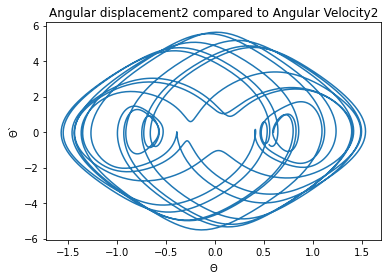

In [6]:
c1 = Initial_Conditions(con.g,1,1,1,1,1.1,0.6,0,0,0.01,30)

AutoPlot(c1,6,1,0.1,0.01)